











# H-SAF Snow Cluster Lab Content

Within the content of this lab session information about snow products those are being
produced by the snow cluster of H-SAF is presented. It is aimed to make the users familiar with the
products and how to make use of the products in their studies easily. This lab session will provide
users a quick reference guide and easy to follow instructions on the snow products. This reference will guide you though 3 steps including:

- ### Module 1
Connect to FTP and retrive data
- ### Module 2
Read downloaded data and visualize
- ### Module 3
Data Projection and Spatial Analysis

<h3 style="color:blue">Snow Products</h3>

The snow products those are being produced by HSAF Snow cluster are as follows, each product
is categorized by the following titles
- H10 – SE-E-SEVIRI
- H11 – WS-E
- H12 – ESC-E
- H13 – SWE-E
- H34 – SE-D-SEVIRI
- H35 – ESC-H

Monitoring and modelling of snow charac¬teristics are important since snow cover is an essential climate variable directly affecting the Earth’s energy balance. Snow cover has a number of important physical properties that exert an influence on global and regional energy, water and carbon cycles. 

- Operational snow products namely H10 (Snow detection (snow mask) by VIS/IR radiometry), 
- H13 (Snow Water Equivalent by MW radiometry), 
- H32(Effective snow cover by VIS/IR radiometry AVHRR Operational in LSA SAF: handover to H SAF in progress), 
- H34(superseding H10 and H31), 
- H35(superseding H12 and H32) have been developed since 2008 within HSAF. 


H11 and H13 are the products obtained from microwave sensors namely SSMI/S and they have 0.25° spatial resolution. H13 retrieval is based on snow depth algorithm based on 19H and 37H microwave channels. H13 algorithm uses the Helsinki University of Technology (HUT) snow emission model having slightly changes in the assimilation for flat/forest and mountainous areas. 


<br></br>
<figure >
    <img src="./image/Jp1.png" style="height:500px" align="center"
         alt="H34">
</figure>
<center>H34  product for January 19, 2019</center>


Validation studies indicate the optical snow products have large snow mapping accuracy with respect to ground snow observations, which varies between 69 and 94% in the winter seasons. Recent studies of H13 product give RMSE as 40 mm for flat areas and 45 mm for mountainous areas for annual snow season. 

<br></br>
<figure >
    <img src="./image/jp2.png" alt="H32" align="center">
</figure>
<center>H32  product for March 22, 2019</center>

Snow products are generated by FMI (flat) and TSMS (mountainous); algorithm development of mountainous areas is carried on by METU.

<br></br>
<figure >
    <img src="./image/jp3.png" style="height:500px" align="center"
         alt="H13">
</figure>
<center>H13  product for March 26, 2019</center>

<br></br>
<figure >
    <img src="./image/h35_20210408_merged.png" style="height:300px" align="center"
         alt="H13">
</figure>
<center>H35 product for April 08, 2021</center>





### Module 1
------------------
Snow products are being stored in a File Transfer Protocol (FTP) Server and each product has the following structure to store the archive data. Raw data is stored as "*.grib2" and "*.H5". In order to download the data following code connects to FTP and download snow product for a specified date.
###### H10 and H34:
    Merged products are stored as HDF and can be reprojected to the given latitude and longitude information provided within the H5 data.
###### H12 and H35:
    Merged products are stored as grib2 files
###### H13:
    Merged products are stored as grib2 files

In [1]:
import glob
import os,sys,gzip
from ftplib import FTP
import datetime
# Reprojection 
#from convert import Decoder as reprojecter
# Widget Settings 
from auxilary import *
from tqdm.auto import tqdm
import warnings
warnings.simplefilter("ignore")
from IPython.display import display,  clear_output, Javascript

## FTP connection Settings 

def download(username, password, product,indate,outdate):
    with FTP('ftphsaf.meteoam.it') as ftp:
        try:
            ftp.login(username, password)
            print('Connected')
        except:
            print("username or passwod is not correct")
        dir = product + '/' + product + '_cur_mon_data'
        ftp.cwd(dir)
        in_ = indate
        last_ = outdate
        init_date = datetime.datetime.strptime(in_, "%Y%m%d")
        last_date = datetime.datetime.strptime(last_, "%Y%m%d")
        filelist = [] 
        days = last_date - init_date

        if not os.path.exists(product+'_data'):
            os.makedirs(product+'_data')

        for i in tqdm(range(days.days), "Downloading: ",days.days):
            date = ((init_date + datetime.timedelta(days=i)).strftime("%Y%m%d"))
            grabFile(product, date, ftp)
        print("Download Process has been finished")

def grabFile(product_flag, date_tag, ftp):
    try:
        dir = os.path.join(os.getcwd(),product_flag+'_data')

        tail = None 
        if product_flag == "h10" or product_flag == "h34": 
            tail = "_day_merged.H5.gz"
        else:
            tail = "_day_merged.grib2.gz"

        file_ = product_flag+"_"+date_tag+tail
        if file_ not in ftp.nlst():
            print(file_, "given date is not accesible in the FTP")
        else:
            localfile = open(os.path.join(dir, file_), 'wb')
            ftp.retrbinary('RETR ' + file_, localfile.write, 1024)
            localfile.close()
            compressed_file = os.path.join(dir, file_)
            input = gzip.GzipFile(compressed_file, 'rb')
            s = input.read()
            input.close()
            output = open(os.path.join(dir, file_[:-3]), 'wb')
            output.write(s)
            output.close()
            os.remove(compressed_file)
    except: 
        print("There is a problem downlading the product")    


display(username, password, w,indate,outdate,button, output)

def on_button_clicked(b):
    with output:
        try:
            fill_and_update_options(w.value,str(indate.value).replace('-', ''),str(outdate.value).replace('-', ''))
            download(username.value,password.value,w.value,str(indate.value).replace('-', ''),str(outdate.value).replace('-', ''))
        except: 
            print("Date range not found, pick another")

button.on_click(on_button_clicked)


## TODO remove later 


#cfg = read_config()
#print(cfg)
#print("Product\t\t:", cfg['product'])
#print("Start Date\t:", cfg['date_interval']['start_date'])
#print("End Date\t:", cfg['date_interval']['end_date'])
#print("selected Date\t:", cfg['selected_date'])
#print("Extension\t:", cfg['ext'])





Text(value='', description='Username:', placeholder='Meteoam username')

Password(description='Password:', placeholder='Meteoam Password')

Dropdown(description='Product:', options=('h10', 'h13', 'h34', 'h35'), value='h10')

DatePicker(value=None, description='Start Date')

DatePicker(value=None, description='End Date')

Button(description='Download', style=ButtonStyle())

Output()

## Module 2
------------------
Downloaded product can be read via pygrib library (or other grib2 readers of your choice). Then, data can be visualized as in the following code snippet. For the sake of the trial we will use the data from 20210408 which is already available.

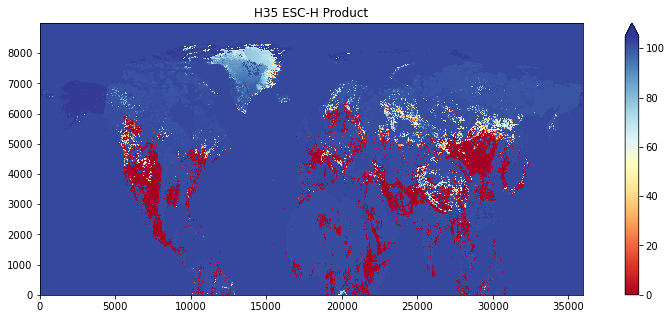

In [3]:
import pygrib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

grbfile = pygrib.open("./h35_data_op/h35_20210408_day_merged.grib2")
grbdata = grbfile.select(name="Remotely sensed snow cover")[0]
data = np.flip(grbdata.values, 0)
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title("H35 ESC-H Product")
ratio = 0.5

pcm = ax.pcolormesh(data, cmap = "RdYlBu")
ax.set_aspect(1.0/ax.get_data_ratio()*ratio)
fig.colorbar(pcm, ax=ax, extend = "max")

plt.show()


In [2]:
quit()